In [81]:
import pandas as pd

df = pd.read_csv('../resources/data/words.csv', delimiter=';')
df = df.sample(frac = 1)

Añadir una columna que codifique la etiqueta como un número, ya que las variables categóricas suelen estar mejor
representadas por números que por strings.

In [82]:
labels = df['label'].unique()
print(labels)

df['category_id'] = df['label'].factorize()[0]
category_id_df = df[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)
df.sample(10)

['altura' 'alimento' 'alergia' 'peso' 'enfermedad' 'objetivo']


,data,label,category_id
118,cuajadas,alergia,2
262,puerros,alimento,1
76,70,peso,3
183,angulas,alimento,1
39,"1,89",altura,0
194,besugi,alimento,1
81,79,peso,3
219,fresas,alimento,1
287,hepatitis,enfermedad,4
229,leche de cabra,alimento,1


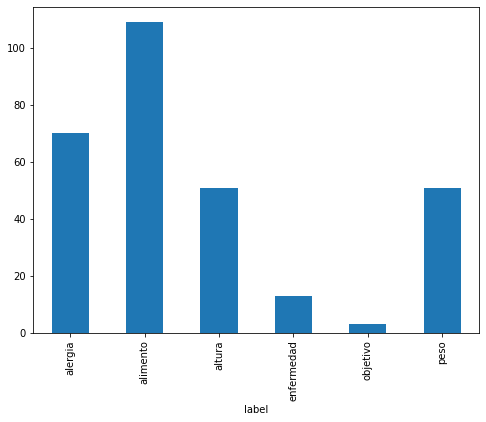

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))
df.groupby('label').data.count().plot.bar(ylim=0)
plt.show()

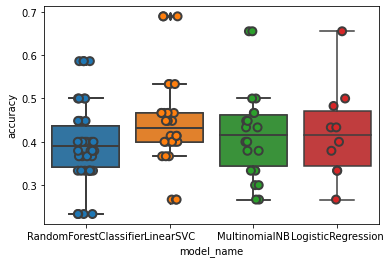

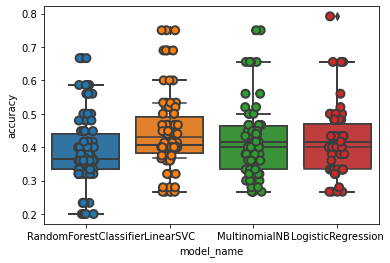

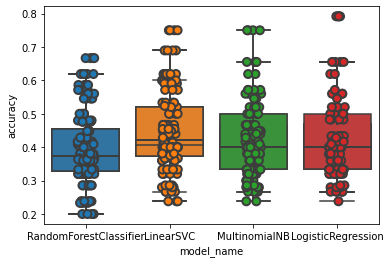

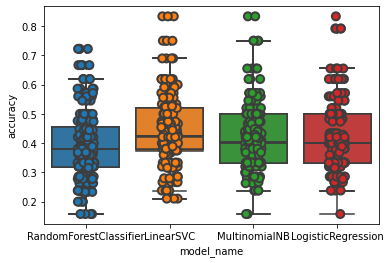

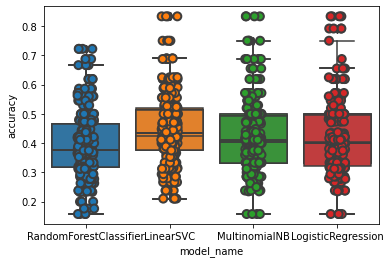

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, KFold

import seaborn as sns

def train(n_splits):
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, X_train_tfidf, df['label'], scoring='accuracy', cv=KFold(n_splits=n_splits))
        for fold_idx, accuracy in enumerate(accuracies):
            entries.append((model_name, fold_idx, accuracy))

        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
        sns.boxplot(x='model_name', y='accuracy', data=cv_df)
        sns.stripplot(x='model_name', y='accuracy', data=cv_df,
                      size=8, jitter=True, edgecolor="gray", linewidth=2)

    plt.show()
    cv_df.groupby('model_name').accuracy.mean()

random_state = 42

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['data'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=random_state),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=random_state),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for n_splits in range(10, 20, 2):
    train(n_splits)

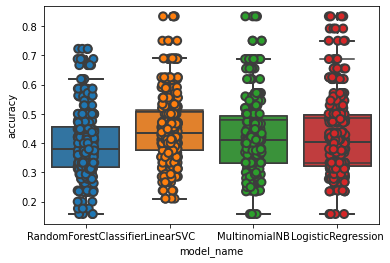

model_name
LinearSVC                 0.449457
LogisticRegression        0.421239
MultinomialNB             0.420856
RandomForestClassifier    0.394837
Name: accuracy, dtype: float64

In [6]:
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train_tfidf, df['label'], scoring='accuracy', cv=KFold(n_splits=10))
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
    sns.boxplot(x='model_name', y='accuracy', data=cv_df)
    sns.stripplot(x='model_name', y='accuracy', data=cv_df,
                  size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()
cv_df.groupby('model_name').accuracy.mean()

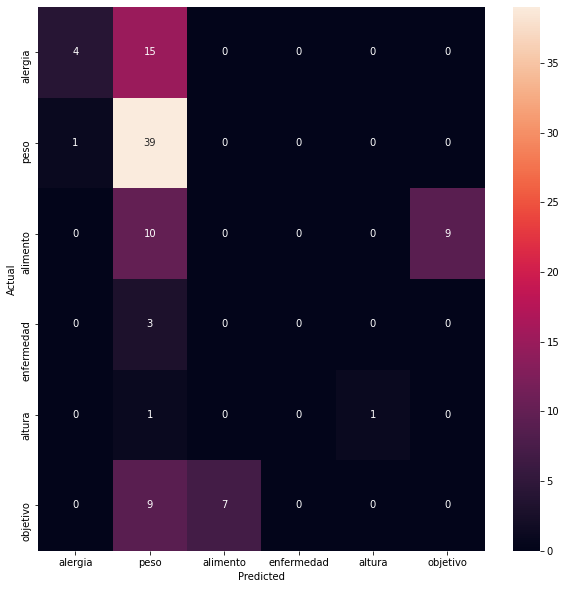

In [7]:
from sklearn.metrics import confusion_matrix

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X_train_tfidf, df['label'], df.index,
                                                                                 test_size=0.33, random_state=random_state)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.label.values, yticklabels=category_id_df.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [8]:
from sklearn import metrics
print(y_pred)
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))

['altura' 'alimento' 'alimento' 'altura' 'alimento' 'alimento' 'alimento'
 'alimento' 'alimento' 'alergia' 'alimento' 'alimento' 'alimento'
 'alimento' 'alimento' 'alimento' 'peso' 'alimento' 'altura' 'alimento'
 'alergia' 'alimento' 'alimento' 'alimento' 'alimento' 'alimento'
 'alimento' 'alimento' 'alimento' 'alimento' 'altura' 'alimento'
 'alimento' 'altura' 'alimento' 'peso' 'alimento' 'peso' 'alimento'
 'alimento' 'alimento' 'alimento' 'alimento' 'peso' 'alimento' 'peso'
 'alimento' 'peso' 'alimento' 'alimento' 'alimento' 'alimento' 'alimento'
 'alimento' 'alimento' 'alimento' 'alimento' 'alimento' 'alimento'
 'alimento' 'alimento' 'alimento' 'alimento' 'alimento' 'alimento'
 'alimento' 'alergia' 'alimento' 'altura' 'alimento' 'alimento' 'alimento'
 'alimento' 'peso' 'peso' 'peso' 'alimento' 'alimento' 'alimento'
 'alimento' 'alimento' 'alimento' 'alimento' 'alimento' 'alimento'
 'altura' 'alimento' 'alergia' 'alimento' 'alimento' 'alimento' 'alimento'
 'alimento' 'alimento' 'alim

c:\users\alvar\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alvar\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\alvar\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [9]:
print(model.predict(count_vect.transform(["cancer"])))

['alimento']


In [84]:
import json

datos = dict()
datos['allergy'] = df[df['label'] == 'alergia']['data'].to_list()
datos['disease'] = df[df['label'] == 'enfermedad']['data'].to_list()

print(datos['allergy'])
print(datos['disease'])

datos['allergy'] = [element.lower() for element in datos['allergy']]
datos['disease'] = [element.lower() for element in datos['disease']]

with open('../resources/data/clear_data.json', 'w') as fp:
    json.dump(datos, fp,  indent=4)

['surimi', 'pan horneado con clara de huevo', 'empanadas - empanadillas', 'cremas', 'leche fermentada', 'yogures', 'Pescados', 'huevos y derivados', 'fabadas', 'crustaceos', 'chocolate con leche y sin leche', 'aceite de pescado', 'Productos enriquecidos con omega 3', 'mazapan', 'Flanes', 'moluscos', 'potitos', 'cremas de cacao', 'caldos concentrados de pescado', 'Rebozados y empanados con huevo', 'productos enriquecidos con omega 6', 'natillas', 'Turrones', 'zumos', 'palitos de cangrejo.', 'horchatas', 'sopas de sobre', 'queso', 'batidos', 'cacao en polvo', 'guisos con frutos secos', 'salchichas comerciales', 'Mayonesas y otras salsas', 'pasta de almendras', 'derivados carnicos', 'helados', 'galletas', 'guisos con pescado', 'Pan rallado con clara de huevo', 'leche de almendras', 'legumbres', 'pastas al huevo', 'mantequillas', 'Sopas', 'caldos deshidratados', 'baguettes', 'Cubitos de caldo', 'pates', 'pan de hamburguesa', 'jamon york', 'polvorones', 'merengue', 'pastas de semola.', 'Har

In [1]:
import json

with open('../resources/data/clear_data.json') as fp:
    datos = json.load(fp)

print(datos['allergy'])
print(datos['disease'])

['surimi', 'pan', 'empanadas', 'empanadillas', 'cremas', 'leche fermentada', 'yogures', 'pescados', 'fabadas', 'crustaceos', 'chocolate', 'aceite de pescado', 'productos enriquecidos con omega 3', 'mazapan', 'flanes', 'moluscos', 'potitos', 'caldos concentrados de pescado', 'rebozados y empanados con huevo', 'productos enriquecidos con omega 6', 'natillas', 'turrones', 'zumos', 'palitos de cangrejo.', 'horchatas', 'sopa', 'queso', 'batidos', 'cacao', 'salchichas comerciales', 'mayonesas y otras salsas', 'pasta', 'derivados carnicos', 'helados', 'galletas', 'guisos con pescado', 'pan rallado', 'leche', 'legumbres', 'mantequillas', 'sopas', 'caldos deshidratados', 'baguettes', 'cubitos de caldo', 'pates', 'pan de hamburguesa', 'jamon york', 'polvorones', 'merengue', 'pastas de semola.', 'harinas de pescado', 'papillas', 'huevo', 'bolleria', 'pan de molde', 'cuajadas', 'cereales', 'pasteleria', 'cremas para ensaladas', 'margarina', 'caramelos', 'frutos secos', 'suero de leche', 'fiambres'

In [23]:
import unidecode
from spacy.lang.es import Spanish
from spacy.matcher import PhraseMatcher

nlp = Spanish()
user_input = unidecode.unidecode("Las enfermedades que tengo son hepatitis y acidez gástrica. Tambien tengo alergias a"
                                 " los helados y a la sopa").lower()
doc = nlp(user_input)

matcher = PhraseMatcher(nlp.vocab)
# Crea objetos Doc patrón y añádelos al matcher
# Esta es una versión más rápida de: [nlp(country) for country in COUNTRIES]
allergy = list(nlp.pipe(datos['allergy']))
disease = list(nlp.pipe(datos['disease']))
matcher.add("allergy", None, *allergy)
matcher.add("disease", None, *disease)
# Llama al matcher sobre el documento de prueba e imprime el resultado en pantalla
for match_id, start, end in matcher(doc):
    print(doc.vocab.strings[match_id], doc[start:end].text)


In [27]:
output = {'allergy': None, 'disease': None}
str1 = 'Hello'
str2 = "World"
key = 'allergy'
for i in range(2):
    if output[key] is None:
        output[key] = str1
    else:
        output[key] = ", ".join((output[key], str2))

print(output)

{'allergy': 'Hello, World', 'disease': None}


In [32]:
import unidecode
from spacy.lang.es import Spanish
from spacy.matcher import PhraseMatcher

nlp = Spanish()

user_data = {'height': 185.0, 'weight': 55.0, 'disease': 'No', 'allergy': 'No', 'imc': 16.07,
        'objective': 'Tu índice de masa corporal está por debajo de los valores recomendados, te voy a proporcionar una dieta alta en calorias para alcanzar un peso adecuado a tu altura de 185cm'}

allergies = '\nHe detectado que tienes la/s siguiente/s alergia/s: {allergy}. Adaptaré la dieta para que no tengas ningún ' \
            'tipo de problema'

diseases = '\nHe detectado que tienes las siguientes enfermedades: {disease}. Adaptaré la dieta para que no tengas ningún tipo de problema'

In [13]:
def __setup_matcher():
    matcher = PhraseMatcher(nlp.vocab)
    allergy = list(nlp.pipe(datos['allergy']))
    disease = list(nlp.pipe(datos['disease']))
    matcher.add("allergy", None, *allergy)
    matcher.add("disease", None, *disease)

    return matcher

def get_types_from_user_input(user_input):
    sentences = None
    for sentence in user_input:
        sentence = unidecode.unidecode(sentence).lower()

        if sentences is None:
            sentences = sentence
        else:
            sentences = ". ".join((sentences, sentence))

    doc = nlp(sentences)

    return __get_types(doc)

def __get_types(doc):
    output = {'allergy': None, 'disease': None}
    matcher = __setup_matcher()
    for match_id, start, end in matcher(doc):
        key = doc.vocab.strings[match_id]
        word = str(doc[start:end])

        if output[key] is None:
            output[key] = word
        else:
            output[key] = ", ".join((output[key], word))

    print(output)
    return output

In [33]:
user_input_data = [(user_data[key]) for key in ('allergy', 'disease')]
types = get_types_from_user_input(user_input_data)

for key, value in types.items():
    sentence = ''
    if value is not None:
        if key == 'allergy':
            sentence = allergies.format(allergy=value)
        if key == 'disease':
            sentence = diseases.format(disease=value)

    user_data[key] = sentence

print(user_data)

{'allergy': None, 'disease': None}
{'height': 185.0, 'weight': 55.0, 'disease': '', 'allergy': '', 'imc': 16.07, 'objective': 'Tu índice de masa corporal está por debajo de los valores recomendados, te voy a proporcionar una dieta alta en calorias para alcanzar un peso adecuado a tu altura de 185cm'}


In [34]:
print(user_data['allergy'])
print(user_data['disease'])